In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv('selected_csv_data.csv')
data.head()

,Unnamed: 0,Timestamp,Annotated_Entities,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
0,0,2019-09-30,"['Nazism', 'Blood_money_%28restitution%29']",1,-4,-3
1,1,2019-09-30,"['Vaccine', 'Vaccine_hesitancy', 'Blog']",2,-1,1
2,2,2019-09-30,"['Muse_%28band%29', 'Talking_to_You']",2,-1,1
3,3,2019-09-30,"['People_of_Northern_Ireland', 'Virtual_file_s...",2,-1,1
4,4,2019-09-30,['CNN'],3,-2,1


In [3]:
data.count()

Unnamed: 0            13905671
Timestamp             13905671
Annotated_Entities    13905671
Positive_Sentiment    13905671
Negative_Sentiment    13905671
Overall_Sentiment     13905671
dtype: int64

In [4]:
# tweets that contain entity China
china = data.loc[data['Annotated_Entities'].str.contains('\'China\'')]
china.head()

,Unnamed: 0,Timestamp,Annotated_Entities,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
56,56,2019-10-01,"['List_of_sovereign_states', 'China']",1,-1,0
64,64,2019-10-01,"['Islamophobia', 'Malaysia', 'Islamophobia', '...",1,-3,-2
80,80,2019-10-01,"['China', 'Impeachment', 'Pastor']",3,-3,0
85,85,2019-10-01,"['China', 'Beef']",1,-1,0
88,88,2019-10-01,"['Adolf_Hitler', 'Karl_Marx', 'China', 'Govern...",1,-3,-2


In [5]:
# tweets that contain entity Covid-19
covid = data.loc[data['Annotated_Entities'].str.contains('\'Coronavirus_disease_2019\'')]
covid.head()

,Unnamed: 0,Timestamp,Annotated_Entities,Positive_Sentiment,Negative_Sentiment,Overall_Sentiment
1274689,1274689,2020-01-30,"['Senate_of_Nigeria', 'China', 'Coronavirus_di...",1,-1,0
1306105,1306105,2020-01-26,"['Endemism', 'BTS', 'BTS', 'Coronavirus_diseas...",1,-4,-3
1315328,1315328,2020-01-26,['Coronavirus_disease_2019'],1,-1,0
1343729,1343729,2020-01-30,"['Wuhan', 'Coronavirus_disease_2019']",1,-1,0
1393790,1393790,2020-01-30,"['Kerala', 'Wuhan', 'MLS_International_Roster_...",3,-1,2


In [6]:
covid.count()

Unnamed: 0            1304616
Timestamp             1304616
Annotated_Entities    1304616
Positive_Sentiment    1304616
Negative_Sentiment    1304616
Overall_Sentiment     1304616
dtype: int64

In [7]:
china.count()

Unnamed: 0            570715
Timestamp             570715
Annotated_Entities    570715
Positive_Sentiment    570715
Negative_Sentiment    570715
Overall_Sentiment     570715
dtype: int64

In [8]:
china['sentiment'] = pd.to_numeric(china['Overall_Sentiment'])
covid['sentiment'] = pd.to_numeric(covid['Overall_Sentiment'])


china['positive'] = pd.to_numeric(china['Positive_Sentiment'])
covid['positive'] = pd.to_numeric(covid['Positive_Sentiment'])

china['negative'] = pd.to_numeric(china['Negative_Sentiment'])
covid['negative'] = pd.to_numeric(covid['Negative_Sentiment'])


C:\Users\1999t\AppData\Local\Temp\ipykernel_8388\3183689616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china['sentiment'] = pd.to_numeric(china['Overall_Sentiment'])
C:\Users\1999t\AppData\Local\Temp\ipykernel_8388\3183689616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['sentiment'] = pd.to_numeric(covid['Overall_Sentiment'])
C:\Users\1999t\AppData\Local\Temp\ipykernel_8388\3183689616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [9]:
#Next section: group data by time

#China
agg_data_china = china.groupby(['Timestamp']).agg({'Unnamed: 0': 'count','sentiment':'mean', 'positive':'mean', 'negative': 'mean'}).reset_index()
agg_data_china=agg_data_china.rename(columns={'Timestamp': 'date', 
                                  'sentiment': 'avg_sentiment','Unnamed: 0': 'count',
                                             'positive': 'avg_positive',
                                             'negative': 'avg_negative'})
agg_data_china['date'] = pd.to_datetime(agg_data_china['date'])
agg_data_china.head()

,date,count,avg_sentiment,avg_positive,avg_negative
0,2019-09-30,61,-0.327869,1.442623,-1.770492
1,2019-10-01,1123,-0.168299,1.488869,-1.657168
2,2019-10-02,673,-0.252600,1.488856,-1.741456
3,2019-10-03,1558,-0.268293,1.427471,-1.695764
4,2019-10-04,1323,-0.284958,1.459562,-1.744520


In [10]:
agg_data_china.count()

date             459
count            459
avg_sentiment    459
avg_positive     459
avg_negative     459
dtype: int64

In [11]:
# Covid-19
agg_data_covid = covid.groupby(['Timestamp']).agg({'Unnamed: 0': 'count','sentiment':'mean', 'positive':'mean', 'negative': 'mean'}).reset_index()
agg_data_covid=agg_data_covid.rename(columns={'Timestamp': 'date', 
                                  'sentiment': 'avg_sentiment',
                                              'Unnamed: 0': 'count',
                                             'positive': 'avg_positive',
                                             'negative': 'avg_negative'})
agg_data_covid['date'] = pd.to_datetime(agg_data_covid['date'])
agg_data_covid.head()

,date,count,avg_sentiment,avg_positive,avg_negative
0,2020-01-22,2,0.000000,1.000000,-1.0
1,2020-01-25,1,1.000000,2.000000,-1.0
2,2020-01-26,3,-1.000000,1.000000,-2.0
3,2020-01-27,1,0.000000,1.000000,-1.0
4,2020-01-30,3,0.666667,1.666667,-1.0


In [12]:
agg_data_covid.count()

date             335
count            335
avg_sentiment    335
avg_positive     335
avg_negative     335
dtype: int64

Text(0, 0.5, 'count of tweets')

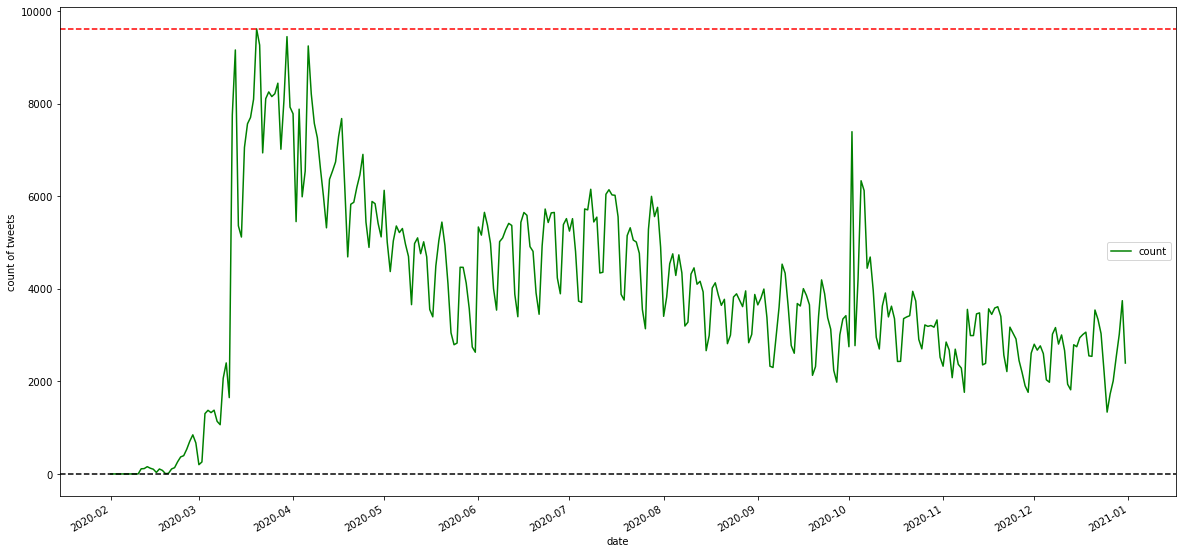

In [13]:
# temporal analysis of number of tweets
from datetime import datetime
filtered_data = agg_data_covid[agg_data_covid['date'] >= datetime(2020, 2, 1)]
ax2=filtered_data.plot('date','count',figsize=(20, 10),x_compat=True, color='g')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.axhline(y=filtered_data['count'].min(), color='black', linestyle='--')
ax2.axhline(y=filtered_data['count'].max(), color='r', linestyle='--')
ax2.set_ylabel("count of tweets")

Text(0, 0.5, 'count of tweets')

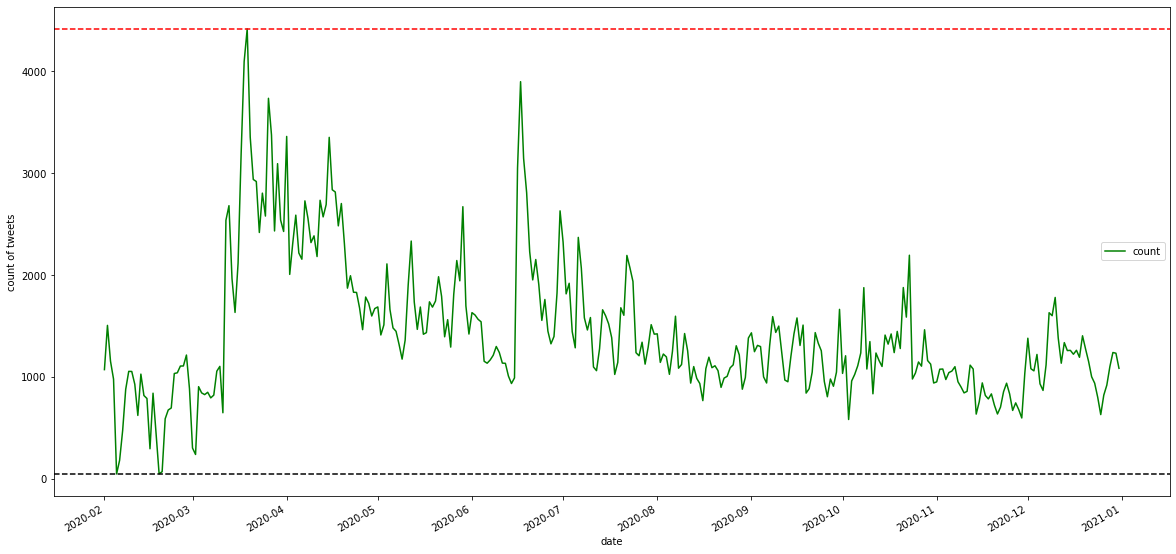

In [14]:
filtered_data = agg_data_china[agg_data_china['date'] >= datetime(2020, 2, 1)]
ax2=filtered_data.plot('date','count',figsize=(20, 10),x_compat=True, color='g')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.axhline(y=filtered_data['count'].min(), color='black', linestyle='--')
ax2.axhline(y=filtered_data['count'].max(), color='r', linestyle='--')
ax2.set_ylabel("count of tweets")

Text(0, 0.5, 'average negative score')

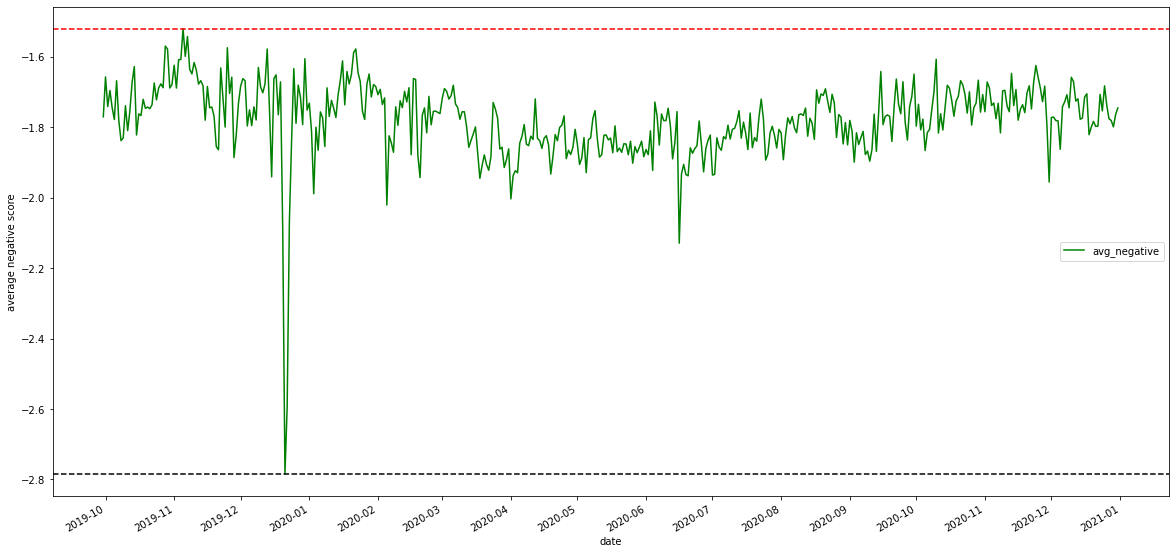

In [15]:
# temporal analysis of sentiment
ax2=agg_data_china.plot('date','avg_negative',figsize=(20, 10),x_compat=True, color='g')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.axhline(y=agg_data_china['avg_negative'].min(), color='black', linestyle='--')
ax2.axhline(y=agg_data_china['avg_negative'].max(), color='r', linestyle='--')
ax2.set_ylabel("average negative score")

Text(0, 0.5, 'average negative score')

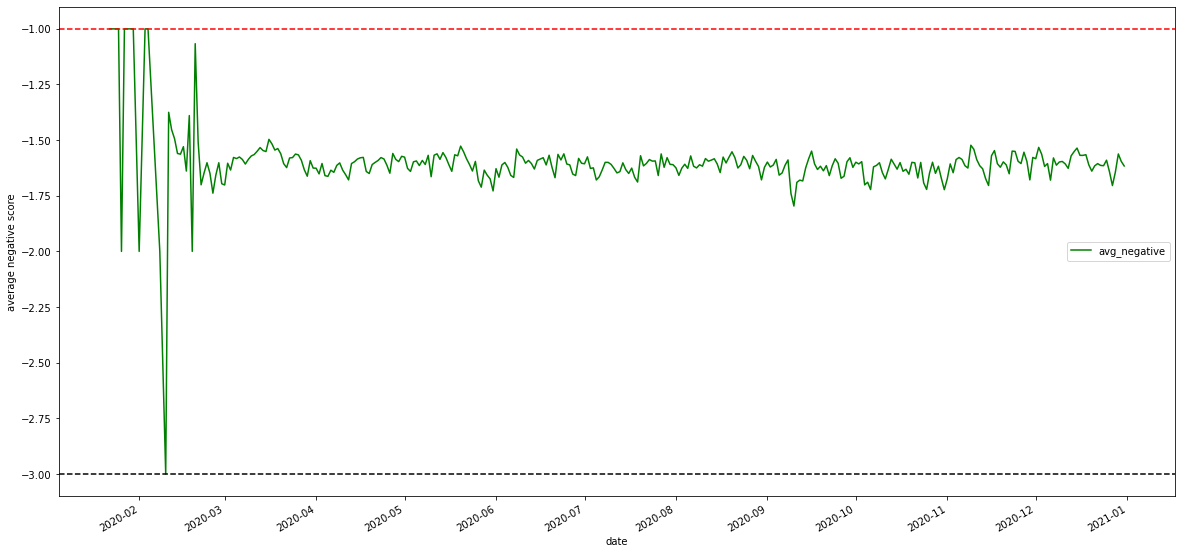

In [16]:

ax2=agg_data_covid.plot('date','avg_negative',figsize=(20, 10),x_compat=True, color='g')
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.axhline(y=agg_data_covid['avg_negative'].min(), color='black', linestyle='--')
ax2.axhline(y=agg_data_covid['avg_negative'].max(), color='r', linestyle='--')
ax2.set_ylabel("average negative score")